# Logistic Regression Model

In [26]:
from pathlib import Path
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport
import pandas as pd

In [27]:
# Prep the data
data = Path('C:/Users/Squid Ink Tony/Jupyter-Workspace/Project2/clean_train.csv')
df = pd.read_csv(data)

y = df["Survived"]
X = df.drop(columns="Survived")

# Split data into test and train subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

# Create and train LR model
classifier = LogisticRegression(random_state=78)

classifier.fit(X_train, y_train)

# Make LR predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

C:\Users\Squid Ink Tony\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Prediction,Actual
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0


In [28]:
# Create confusion matrix
confusion_matrix(y_test, predictions)

array([[119,  18],
       [ 30,  56]], dtype=int64)

In [29]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8083832335329342
Testing Data Score: 0.7847533632286996


C:\Users\Squid Ink Tony\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


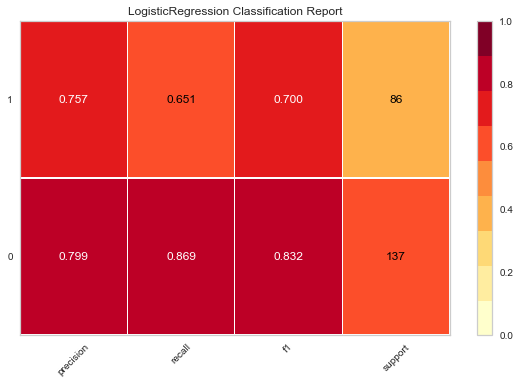

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [30]:
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(classifier, support=True)
visualizer.fit(X_train, y_train)  

# Fit the visualizer and the model
visualizer.score(X_test, y_test)  

# Evaluate the model on the test data
visualizer.show()

In [31]:
# Create the classification report
target_names = ["Deceased", "Survivor"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

    Deceased       0.80      0.87      0.83       137
    Survivor       0.76      0.65      0.70        86

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



## Implementing Cross-Validation

In [32]:
from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(10)
model_cv.fit(X_train, y_train)

C:\Users\Squid Ink Tony\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass Cs=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Squid Ink Tony\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Squid Ink Tony\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOT

LogisticRegressionCV()

In [33]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression(C=10)
scores = cross_val_score(model, X_train, y_train, cv=4)
scores

C:\Users\Squid Ink Tony\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Squid Ink Tony\anaconda3\envs\tensorflow2\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

array([0.77245509, 0.81437126, 0.82634731, 0.81437126])

In [36]:
print(f"Training Data Score: {model_cv.score(X_train, y_train)}")
print(f"Testing Data Score: {model_cv.score(X_test, y_test)}")

Training Data Score: 0.811377245508982
Testing Data Score: 0.7847533632286996
